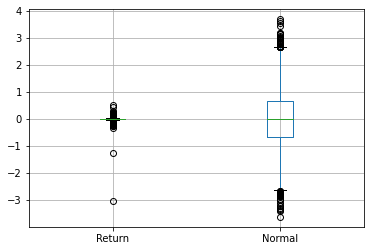

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from scipy.stats import norm
import pylab
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors

data = pd.read_csv("DCOILWTICO.csv") 

nan_value = float("NaN")

data.replace("", nan_value, inplace=True)
data.replace(".", nan_value, inplace=True)

data['Previous'] = data['DCOILWTICO'].shift(1)

#data.dropna(subset=['Previous'],inplace=True)
#data.replace("", nan_value, inplace=True)
#data.replace(".", nan_value, inplace=True)

data['DCOILWTICO'] = data['DCOILWTICO'].astype(float)

data['Previous'] = data['Previous'].astype(float)

data['Diff'] = data['DCOILWTICO'] - data['Previous']

data['Return'] = (data['DCOILWTICO'] - data['Previous'])/data['Previous']

data.dropna(subset = ["Return"], inplace=True)

Return_array = data["Return"].to_numpy()

np.random.seed(10)
data['Normal'] = np.random.normal(data['Return'].mean(), 1, data.shape[0])

boxplot = data.boxplot(column=['Return', 'Normal'])


In [307]:
data['Return'].describe()


count    8752.000000
mean        0.000020
std         0.044199
min        -3.019661
25%        -0.011795
50%         0.000658
75%         0.012767
max         0.530864
Name: Return, dtype: float64

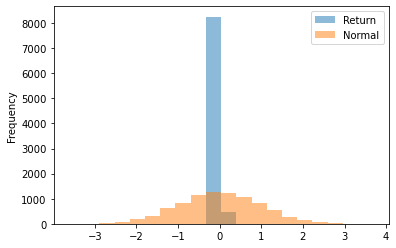

In [297]:
ax = data[['Return','Normal']].plot.hist(bins=20, alpha=0.5)

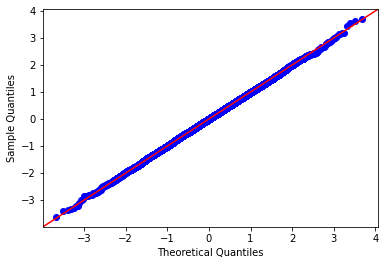

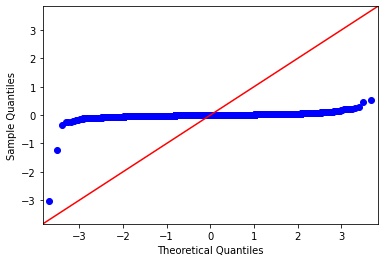

In [294]:
sm.qqplot(data['Normal'], line='45')

sm.qqplot(data['Return'], line='45')

pylab.show()

In [309]:
stats.kstest(data['Return'], 'norm')

KstestResult(statistic=0.46234035471243196, pvalue=0.0)

In [310]:
stats.kstest(data['Normal'], 'norm')

KstestResult(statistic=0.0065050665923439555, pvalue=0.8503125836711446)

In [282]:
lilliefors(data['Return'])

(0.1783466502663964, 0.0009999999999998899)

In [285]:
stats.shapiro(data['Return'])

C:\Users\DioandNono\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.366584837436676, pvalue=0.0)

In [287]:
stats.anderson(data['Return'], dist='norm')

AndersonResult(statistic=778.0532737596477, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [267]:
counts_number, bin_edges = np.histogram( data['Return'] , bins=12)

rel_freq =counts_number/np.shape(data)[0]

counts_number

array([   1,    0,    0,    0,    0,    0,    1,    0,    0,  131, 8615,
          4], dtype=int64)

In [268]:
rel_freq

array([1.14259598e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.14259598e-04, 0.00000000e+00,
       0.00000000e+00, 1.49680073e-02, 9.84346435e-01, 4.57038391e-04])

In [ ]:

qc = pd.qcut(data['Return'], q=3, precision=1)

In [313]:
qc

1          (0.008, 0.5]
2          (0.008, 0.5]
3        (-3.1, -0.007]
4       (-0.007, 0.008]
5       (-0.007, 0.008]
             ...       
9358    (-0.007, 0.008]
9359     (-3.1, -0.007]
9360    (-0.007, 0.008]
9361     (-3.1, -0.007]
9362       (0.008, 0.5]
Name: Return, Length: 8752, dtype: category
Categories (3, interval[float64]): [(-3.1, -0.007] < (-0.007, 0.008] < (0.008, 0.5]]

In [315]:
qc.unique

<bound method Series.unique of 1          (0.008, 0.5]
2          (0.008, 0.5]
3        (-3.1, -0.007]
4       (-0.007, 0.008]
5       (-0.007, 0.008]
             ...       
9358    (-0.007, 0.008]
9359     (-3.1, -0.007]
9360    (-0.007, 0.008]
9361     (-3.1, -0.007]
9362       (0.008, 0.5]
Name: Return, Length: 8752, dtype: category
Categories (3, interval[float64]): [(-3.1, -0.007] < (-0.007, 0.008] < (0.008, 0.5]]>

In [249]:
np.shape(data)[0]

8752

In [253]:
counts_number, bin_edges = np.histogram( data['Return'] , bins=10,density=True)

rel_freq =counts_number/np.shape(data)[0]



array([-3.01966139, -2.66460883, -2.30955627, -1.95450371, -1.59945115,
       -1.24439859, -0.88934604, -0.53429348, -0.17924092,  0.17581164,
        0.5308642 ])

array([3.21810377e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.21810377e-04, 0.00000000e+00, 1.93086226e-03,
       2.81037003e+00, 3.53991415e-03])

https://stackoverflow.com/questions/12863059/python-how-to-make-an-histogram-with-equally-sized-bins

https://github.com/SundareshPrasanna/QQPlot-Medium/blob/main/Q-Q%20Plots%20Underlying%20codes.ipynb

https://python-course.eu/numerical-programming/creating-numpy-arrays.php#:~:text=The%20function%20%22shape%22%20returns%20the,elements%20per%20axis%20(dimension).